In [21]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import pickle
import gc
import re
# ここから自作
import model
import result
import mode
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [22]:
# 時刻を表示してくれるようになるprint関数のwrapper
def datePrint(*args, **kwargs):
    from datetime import datetime
    print(datetime.now().strftime('[%Y/%m/%d %H:%M:%S] '), end="")
    print(*args, **kwargs)

In [3]:
datePrint("loading pickle data")
input_0 = pickle.load(open("../data/dna_len5_random256/input_test0.pkl","rb"))
target_0 = pickle.load(open("../data/dna_len5_random256/target_test0.pkl","rb"))
target_0 = torch.flip(target_0, dims=[1])
input_1 = pickle.load(open("../data/dna_len5_random256/input_train0.pkl","rb"))
target_1 = pickle.load(open("../data/dna_len5_random256/target_train0.pkl","rb"))
target_1 = torch.flip(target_1, dims=[1])
input_2 = pickle.load(open("../data/dna_len5_random256/input_train2.pkl","rb"))
target_2 = pickle.load(open("../data/dna_len5_random256/target_train2.pkl","rb"))
target_2 = torch.flip(target_2, dims=[1])
input_3 = pickle.load(open("../data/dna_len5_random256/input_train3.pkl","rb"))
target_3 = pickle.load(open("../data/dna_len5_random256/target_train3.pkl","rb"))
target_3 = torch.flip(target_3, dims=[1])
input_4 = pickle.load(open("../data/dna_len5_random256/input_train1.pkl","rb"))
target_4 = pickle.load(open("../data/dna_len5_random256/target_train1.pkl","rb"))
target_4 = torch.flip(target_4, dims=[1])
input_5 = pickle.load(open("../data/dna_len5_random256/input_train4.pkl","rb"))
target_5 = pickle.load(open("../data/dna_len5_random256/target_train4.pkl","rb"))
target_5 = torch.flip(target_5, dims=[1])
input_6 = pickle.load(open("../data/dna_len5_random256/input_test1.pkl","rb"))
target_6 = pickle.load(open("../data/dna_len5_random256/target_test1.pkl","rb"))
target_6 = torch.flip(target_6, dims=[1])
input_7 = pickle.load(open("../data/dna_len5_random256/input_test2.pkl","rb"))
target_7 = pickle.load(open("../data/dna_len5_random256/target_test2.pkl","rb"))
target_7 = torch.flip(target_7, dims=[1])
input_8 = pickle.load(open("../data/dna_len5_random256/input_test3.pkl","rb"))
target_8 = pickle.load(open("../data/dna_len5_random256/target_test3.pkl","rb"))
target_8 = torch.flip(target_8, dims=[1])
input_9 = pickle.load(open("../data/dna_len5_random256/input_test4.pkl","rb"))
target_9 = pickle.load(open("../data/dna_len5_random256/target_test4.pkl","rb"))
target_9 = torch.flip(target_9, dims=[1])




input_all = torch.cat([input_0, input_1, input_2, input_3, input_4, input_5, input_6, input_7, input_8, input_9], dim=0)
target_all = torch.cat([target_0, target_1, target_2, target_3, target_4, target_5, target_6, target_7, target_8, target_9], dim=0)
dataset = model.Dataset(input_all, target_all)
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [900000, 100000])

del input_0, target_0, input_1, target_1, input_2, target_2, input_3, target_3, input_4, target_4, input_all, target_all
gc.collect()


[2021/03/11 20:40:21] loading pickle data


0

In [4]:
import math
def lambda_epoch(epoch):
    # スケジューラの設定
    max_epoch = 20
    return math.pow((1-epoch/max_epoch), 0.9)

[2021/03/11 20:40:32] 0 layer 0 flag


Epoch 1/20
train Loss:0.8654575493155585 Timer:413.4933578968048
val Loss:0.4969015180683136 Timer:12.770741939544678
Epoch 2/20
train Loss:0.389288621412913 Timer:412.75221729278564
val Loss:0.3215118994140625 Timer:12.727022647857666
Epoch 3/20
train Loss:0.2709456200986438 Timer:411.4738221168518
val Loss:0.23889455801010132 Timer:12.791844129562378
Epoch 4/20
train Loss:0.21790211644543542 Timer:413.6994390487671
val Loss:0.19624151639461518 Timer:12.816640377044678
Epoch 5/20
train Loss:0.1871127860021591 Timer:412.8744032382965
val Loss:0.17752739315509797 Timer:19.784903049468994


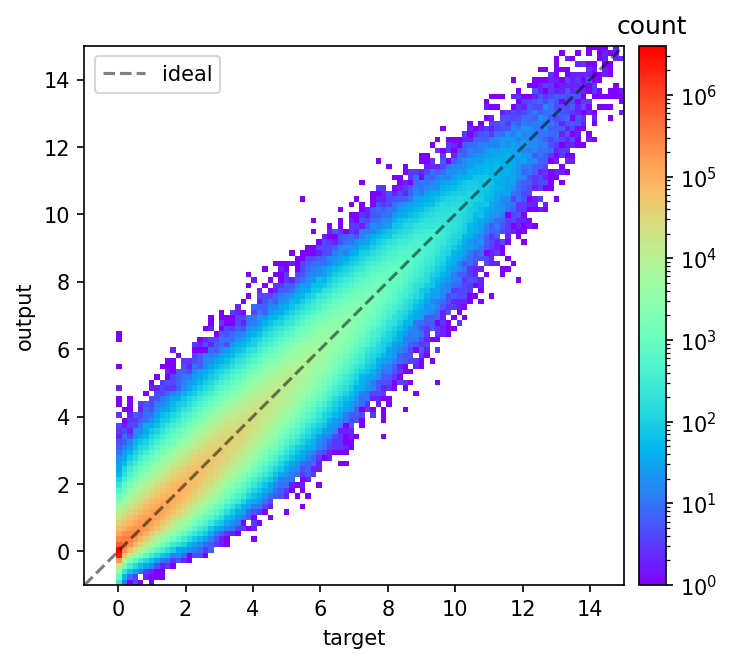

Epoch 6/20
train Loss:0.1657245881149504 Timer:414.34953236579895
val Loss:0.16258951182842254 Timer:12.893071413040161
Epoch 7/20
train Loss:0.14821859853956434 Timer:414.7409870624542
val Loss:0.1424797281694412 Timer:12.669304370880127
Epoch 8/20
train Loss:0.13578274763796064 Timer:414.1484200954437
val Loss:0.13207539048194886 Timer:12.913934469223022
Epoch 9/20
train Loss:0.12534625305599637 Timer:413.39608216285706
val Loss:0.12946832877159117 Timer:12.92212462425232
Epoch 10/20
train Loss:0.1178558741678132 Timer:410.91299414634705
val Loss:0.1198390606546402 Timer:20.048048734664917


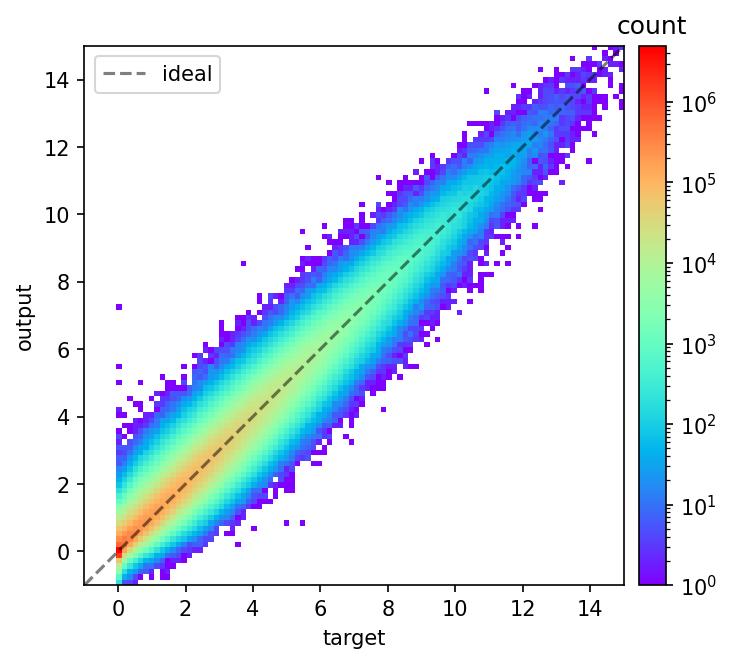

Epoch 11/20
train Loss:0.11177892089234458 Timer:406.23736023902893
val Loss:0.11069066376209259 Timer:12.09231686592102
Epoch 12/20
train Loss:0.10651578272872501 Timer:404.3270709514618
val Loss:0.1060995012164116 Timer:12.085046529769897
Epoch 13/20
train Loss:0.10272743904934989 Timer:406.5483958721161
val Loss:0.10520759343862533 Timer:12.206022262573242
Epoch 14/20
train Loss:0.09863467170794805 Timer:405.3724160194397
val Loss:0.09926107496500015 Timer:12.228045463562012
Epoch 15/20
train Loss:0.0955051732495096 Timer:405.4823019504547
val Loss:0.09577141972780227 Timer:19.113296270370483


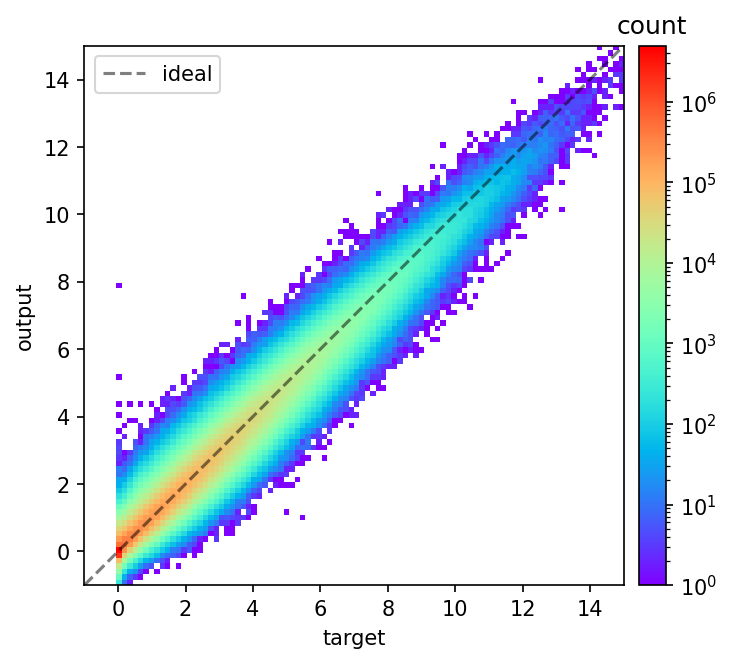

Epoch 16/20
train Loss:0.09288689635329776 Timer:405.55029344558716
val Loss:0.09261953753948211 Timer:12.473774194717407
Epoch 17/20
train Loss:0.09001476328081555 Timer:405.0797007083893
val Loss:0.09582820565462112 Timer:12.117876768112183
Epoch 18/20
train Loss:0.0878554858356052 Timer:406.2311313152313
val Loss:0.09196581461429595 Timer:12.105848550796509
Epoch 19/20
train Loss:0.0860237001016405 Timer:406.79867601394653
val Loss:0.0872075182056427 Timer:12.137040376663208
Epoch 20/20
train Loss:0.0843943120736546 Timer:406.2064938545227
val Loss:0.08550051679134368 Timer:19.1516432762146


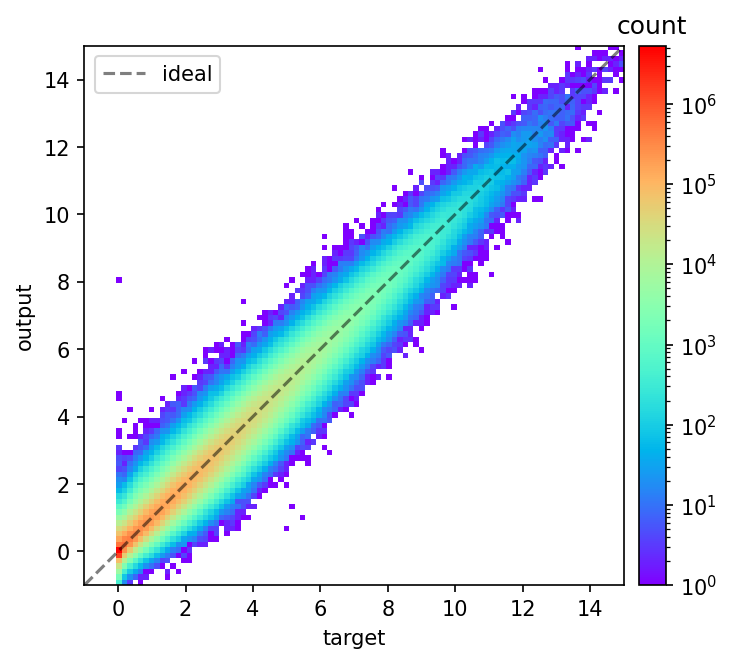

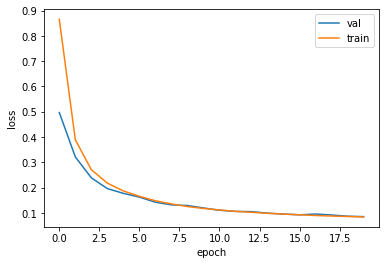

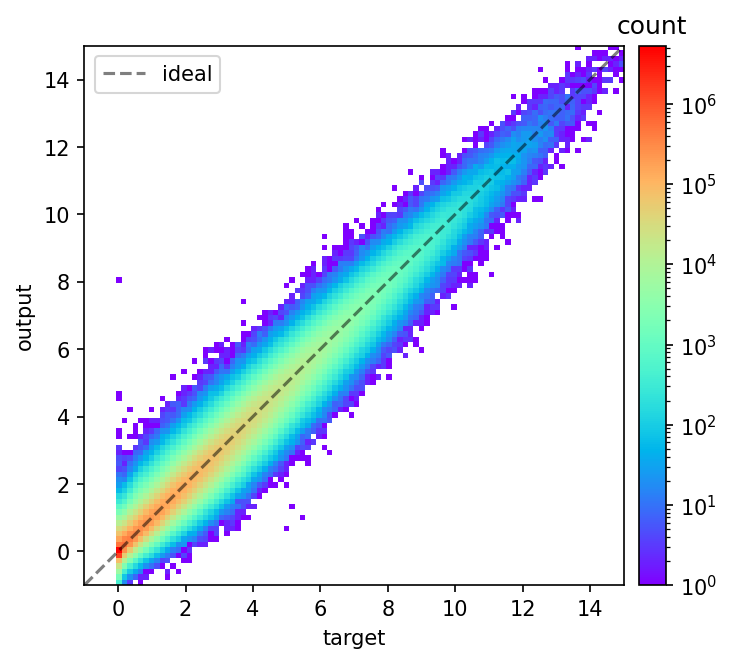

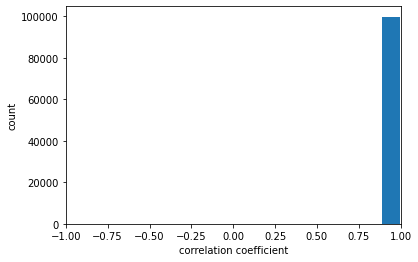

0.9797325551449803


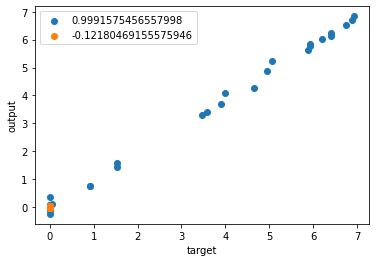

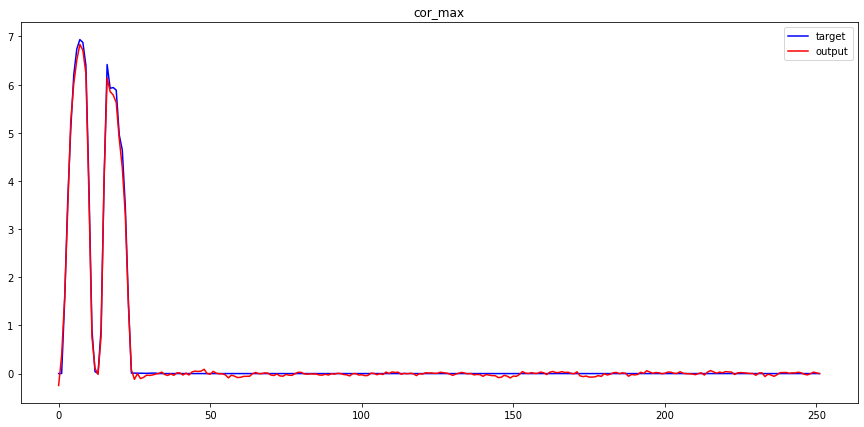

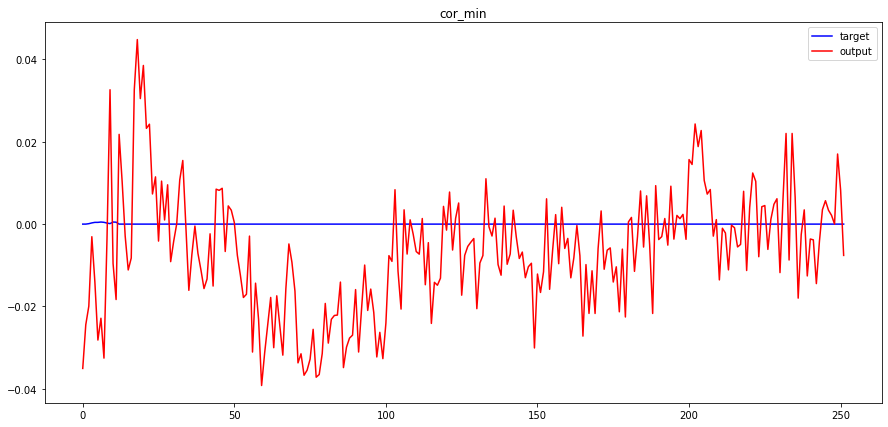

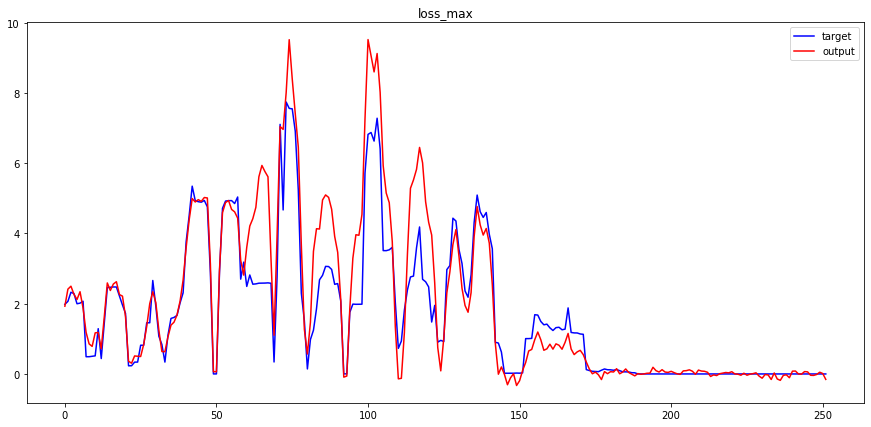

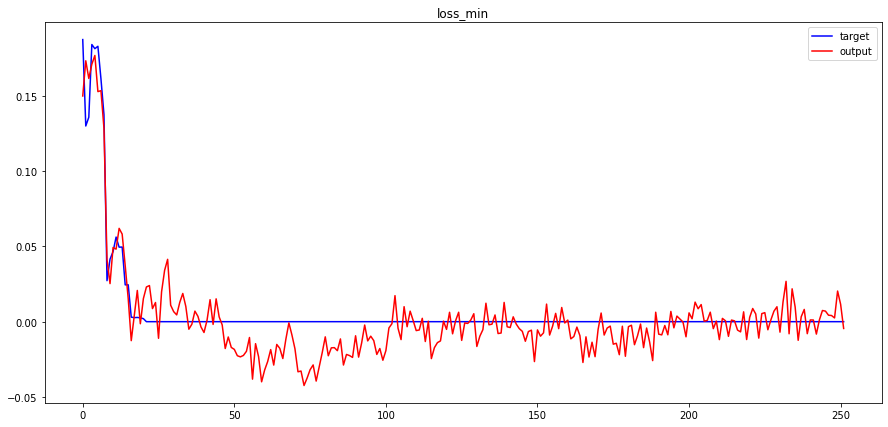

cor_max ACGAUUUCGCCUCAAGCAGGGUGAUAUAAGGAAGAUG
cor_min CCCCCCUUUCAUUCAU
loss_max CCGGCUGAUGCUUCCCAGGUGACAUUACACACACCGCCUGUGGGAAGACUAGAAUGUCUUACGUAGUCCUAGGAGGACUAGAAGUCCUUGACAAGAAAGUUAGGGGCGGGAAGAUCUCUGUCCAGGACGUGUGCGACAGCGCUGUUUAUCAUAUCCGCCGCACGAGCCAAGCACCAAUAAUUGUCCUAUUUUU
loss_min GUAUACGCAUCCACACAAAUCCCAU


In [5]:
batch_size = 64
train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
val_dataloader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=True, num_workers=1)
dataloaders_dict = {'train': train_dataloader, 'val': val_dataloader}

for n in [0]:
    for x in [0]:
        datePrint(n, 'layer', x, 'flag')
        net = model.Fixed(num_layer=16, flag=False).to(device)
        net.apply(model.weight_init) #重みの初期化適用

        #ファインチューニング
#         optimizer = optim.Adam([{'params': net.embedding.parameters(), 'lr': 5e-4},
#                                 {'params': net.convs.parameters(), 'lr': 1e-4},
#                                 {'params': net.mid.parameters(), 'lr': 5e-4},
#                                 {'params': net.fc.parameters(), 'lr': 1e-3}], weight_decay=1e-6)
        optimizer = optim.Adam(net.parameters(), lr=1e-4, weight_decay=1e-6, eps=1e-5)

        epochs = 20
        criterion = nn.MSELoss().to(device)
        
        
#         # 学習途中データ
#         checkpoint = torch.load('256_middle_dna.pth')
#         net.load_state_dict(checkpoint['model_state_dict'])
#         optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#         epochs = checkpoint['epoch']
#         loss = checkpoint['loss']
        
        scheduler = optim.lr_scheduler.LambdaLR(optimizer, lr_lambda=lambda_epoch)
        train_loss_list, val_loss_list, data_all, target_all, output_all = mode.train(device, net, dataloaders_dict, criterion, optimizer, epochs)               
        torch.save(net.state_dict(), '256_finish_dna.pth')

        result.learning_curve(train_loss_list, val_loss_list, epochs)
        result.plot_result(np.array(target_all, dtype=object).reshape(-1), np.array(output_all, dtype=object).reshape(-1))
        cor_list, loss_list = result.cal_indicators(target_all, output_all)
        result.cor_hist(cor_list)
        result.scatter_minmax(cor_list, loss_list, target_all, output_all)
        result.visible_minmax(target_all, output_all, cor_list, loss_list)
        result.show_base(data_all, cor_list, loss_list)

In [66]:
# input_test = pickle.load(open("../data/test_sets/input_600_1000.pkl","rb"))
# target_test = pickle.load(open("../data/test_sets/target_600_1000.pkl","rb"))
input_test = pickle.load(open("../data/RF00156/input_RF00156.pkl","rb"))
target_test = pickle.load(open("../data/RF00156/target_RF00156.pkl","rb"))
target_test = torch.flip(target_test, dims=[1])
datePrint(input_test.shape)
datePrint(target_test.shape)
if (input_test.shape[1]%256 != 0):
    input_test = F.pad(input_test, (0, 256-input_test.shape[1]%256))
    target_test = F.pad(target_test, (0, 252-target_test.shape[1]%256))
if (input_test.shape[1]>256):
    transform = True
    division = (input_test.shape[1])//128 - 1
    input_init = input_test
    input_test = input_test.unfold(1, 256, 128).reshape(-1, 256)
    target_test = target_test.unfold(1, 252, 128).reshape(-1, 252)
else:
    transform = False
datePrint(input_test.shape)
datePrint(target_test.shape)
test_dataset = model.Dataset(input_test, target_test)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=64,shuffle=False, num_workers=1)

net = model.Fixed(num_layer=16, flag=False).to(device)
net.load_state_dict(torch.load('256_finish_dna.pth'))
criterion = nn.MSELoss().to(device)

start = time.time()
test_loss, data_all, target_all, output_all = mode.test(device, net, test_dataloader, criterion) 

datePrint('finish prediction loss', test_loss)
if (transform==True):
    target_tmp = torch.tensor(target_all)
    output_tmp = torch.tensor(output_all)
    output_tmp = F.relu(output_tmp)
    for n in range(division):
        if (n==0):
            target_all = target_tmp[n::division, :192]
            output_all = output_tmp[n::division, :192]
        elif (n==division-1):
            target_all = torch.cat([target_all, target_tmp[n::division, 64:]], dim=1)
            output_all = torch.cat([output_all, output_tmp[n::division, 64:]], dim=1)
        else:
            target_all = torch.cat([target_all, target_tmp[n::division, 64:192]], dim=1)
            output_all = torch.cat([output_all, output_tmp[n::division, 64:192]], dim=1)
    
    data_all = input_init.numpy()
    target_all = target_all.numpy()
    output_all = output_all.numpy()
finish = time.time()
np.savetxt('accessibility_output.txt', output_all, fmt='%.3e')
# finish = time.time()
datePrint('予測時間', (finish-start))

[2021/03/12 03:45:32] torch.Size([1332, 256])
[2021/03/12 03:45:32] torch.Size([1332, 252])
[2021/03/12 03:45:32] torch.Size([1332, 256])
[2021/03/12 03:45:32] torch.Size([1332, 252])
[2021/03/12 03:45:32] finish prediction loss 0.09023611495892207
[2021/03/12 03:45:32] 予測時間 0.5672886371612549


In [67]:
#0だらけの範囲を削ったlossを求める
cor_list = []
loss_list = []
for n in range(len(target_all)):
    mse = 0
    cor = np.corrcoef(target_all[n][:126], output_all[n][:126])
    cor_list.append(cor[0, 1])
    mse = ((target_all[n][:126] - output_all[n][:126])**2).mean(axis=0)
    loss_list.append(mse)

[2021/03/12 03:45:40] test_loss: 0.090


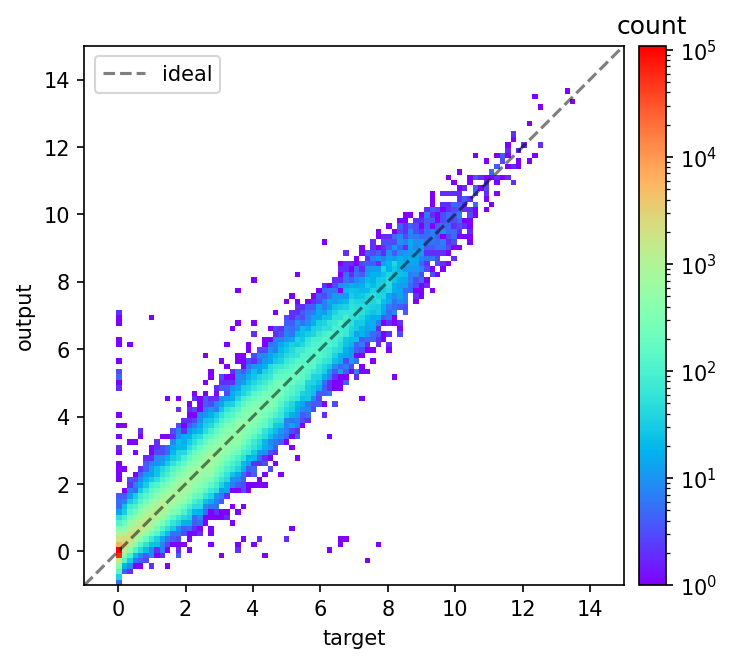

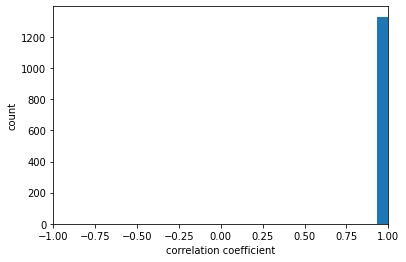

0.986322889445833


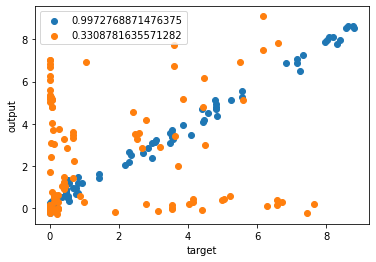

In [68]:
datePrint('test_loss: {:.3f}'.format(test_loss))
result.plot_result(np.array(target_all).reshape(-1), np.array(output_all).reshape(-1))
cor_list, loss_list = result.cal_indicators(target_all, output_all)
result.cor_hist(cor_list)
result.scatter_minmax(cor_list, loss_list, target_all, output_all)

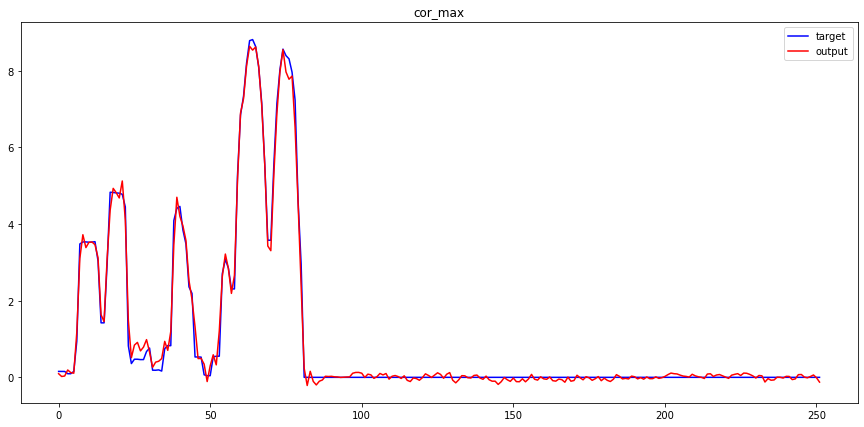

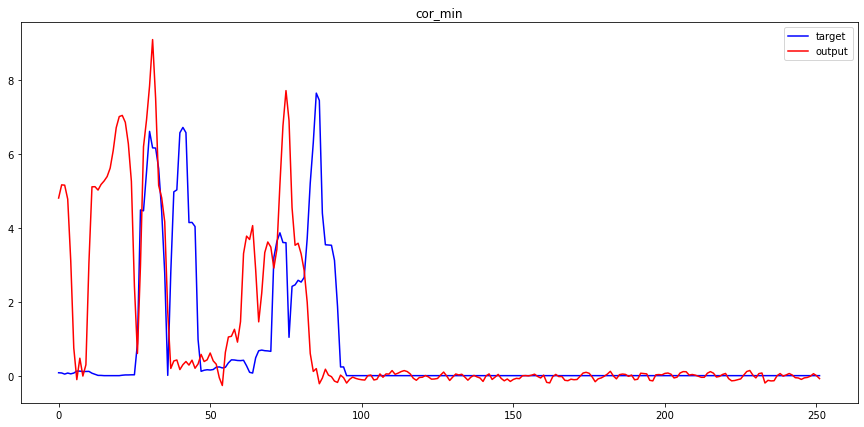

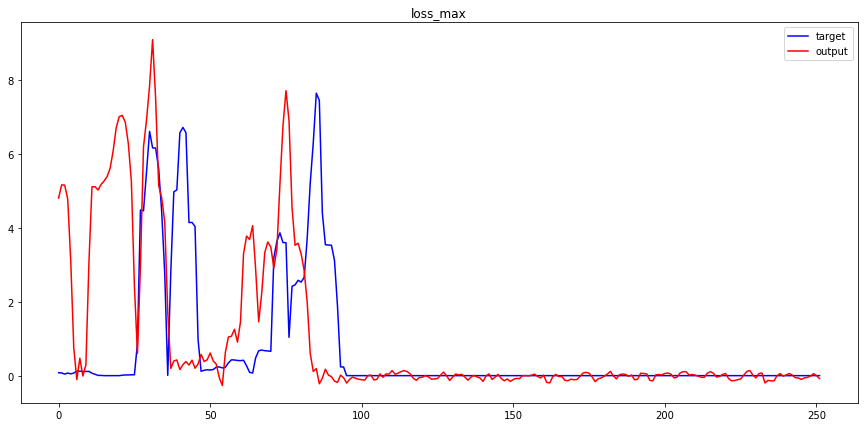

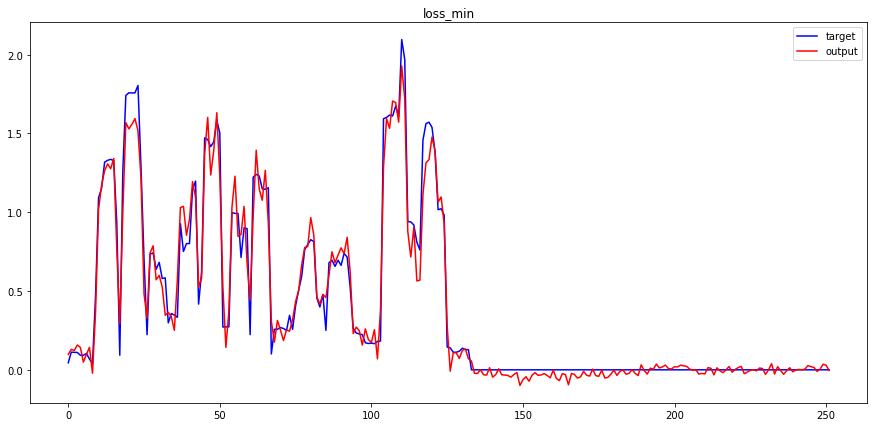

cor_max AAGACCCUUCAGCUGCAACCAGCUUCCUUGUUAGUGUGUGCAGCCUGUUUCUUGUAUUGGCUGCUCUAAGGGACCUUGGAGAUAGAC
cor_min CUGCCUCGAAGUCUGGCAAUGGCUGCAAACAGCAGCUUCCUUGGUAGUGUUCUUUGUAUGGGUUGCUCUAAGGGACCUUGGAGACAGGC
loss_max CUGCCUCGAAGUCUGGCAAUGGCUGCAAACAGCAGCUUCCUUGGUAGUGUUCUUUGUAUGGGUUGCUCUAAGGGACCUUGGAGACAGGC
loss_min CUGCAGCCAAAUAAGCCCACCAGGUUCCUUUGCACAUAGAAGCUGAUAUGCAAUGGCCGCAAAUAGCAAAUAGCCUCCUUAGUAGUAUACCUAGUCUGUUGUUUGUAUGGUUGACCUAGAGGACCUUGAAGACAGAG


In [69]:
result.visible_minmax(target_all, output_all, cor_list, loss_list)
result.show_base(data_all, cor_list, loss_list)

random= 453


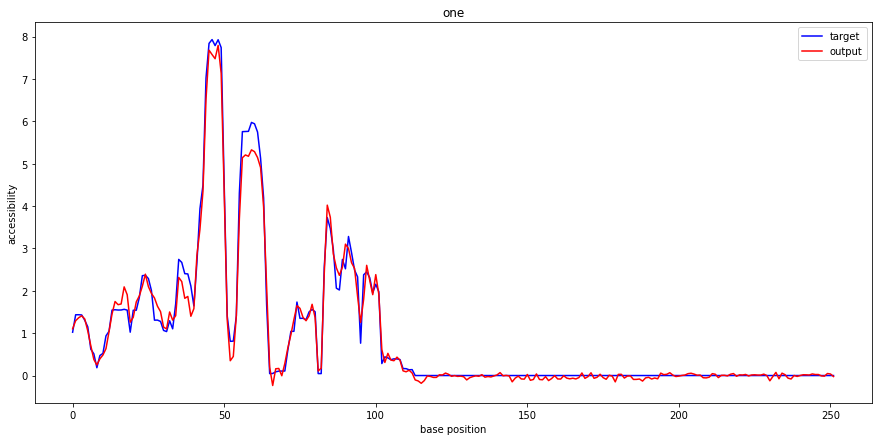

random= 82


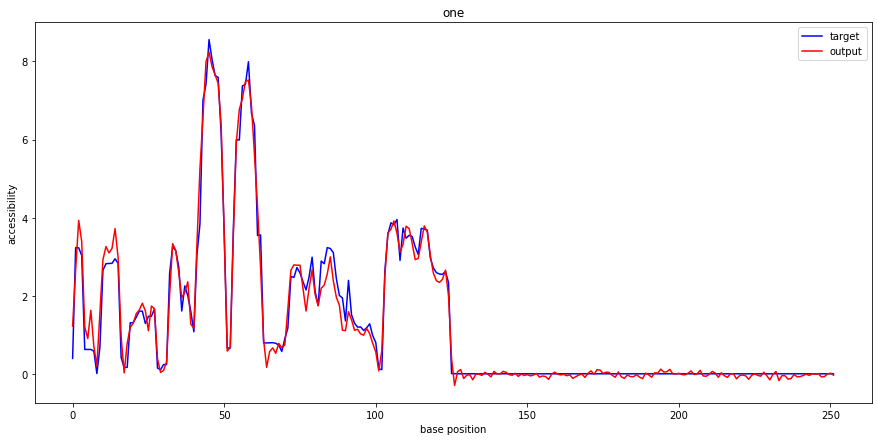

random= 771


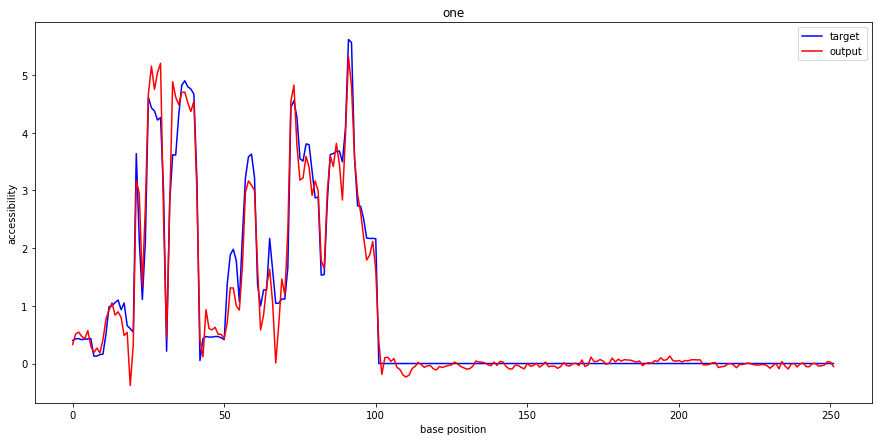

random= 1228


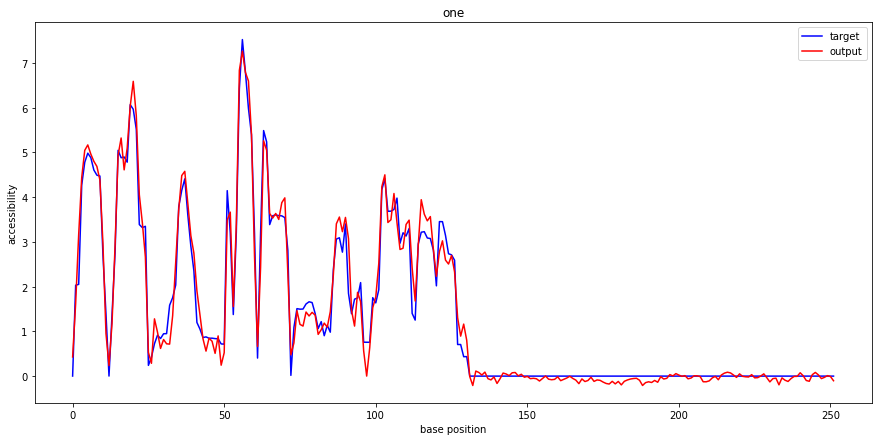

In [71]:
for i in range(4):
    result.visible_one(target_all, output_all)

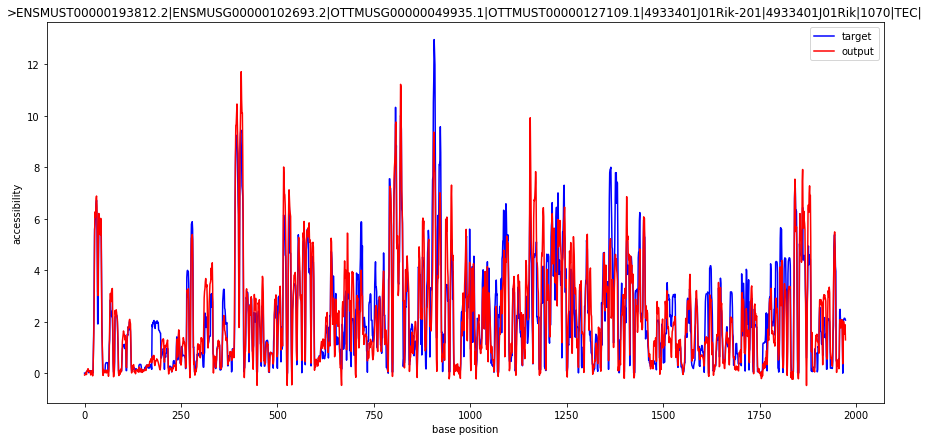

cor 0.8841705406680083
mse 0.9112400933160619
[2021/03/12 04:41:45] 予測時間 0.4853401184082031


In [82]:
start = time.time()
path = "../data/mouse_data/seq4.fa"
with open(path, mode = 'r', encoding = 'utf-8') as f:
    seq_file = f.read().splitlines()
indexes = [i for i, n in enumerate(seq_file) if n.startswith('>')]
name = seq_file[0]
seq = ''.join(seq_file[1:]).replace('A', '1').replace('T', '2').replace('U', '2').replace('G', '3').replace('C', '4')
input_seq = torch.Tensor(list(map(int, seq)))
input_seq = torch.flip(input_seq, dims=[0])
input_seq = input_seq.unsqueeze(0)
out_length = len(input_seq[0])-4

if (input_seq.shape[1]%256 != 0):
    input_seq = F.pad(input_seq, (0, 256-input_seq.shape[1]%256))
if (input_seq.shape[1]>256):
    transform = True
    division = (input_seq.shape[1])//128 - 1
    input_init = input_seq
    input_seq = input_seq.unfold(1, 256, 128).reshape(-1, 256)
else:
    transform = False
input_seq = input_seq.unsqueeze(0)

net = model.Fixed(num_layer=16, flag=False).to(device)
net.load_state_dict(torch.load('256_finish_dna.pth'))
    
data_all, output_all = mode.predict(device, net, input_seq) 

if (transform==True):
    output_tmp = torch.tensor(output_all)
    for n in range(division):
        if (n==0):
            output_all = output_tmp[n::division, :192]
        elif (n==division-1):
            output_all = torch.cat([output_all, output_tmp[n::division, 64:]], dim=1)
        else:
            output_all = torch.cat([output_all, output_tmp[n::division, 64:192]], dim=1)
    
    data_all = input_init.numpy()
#     output_all = torch.flip(output_all, dims=[1])
    output_all = output_all.numpy()
  
import matplotlib.pyplot as plt
max_length = output_all.shape[1]
with open('../data/mouse_data/out4.txt', 'r') as f:
        next(f)
        acc = f.readlines()
        acc_list = []
        for i in range(len(acc)-1):
                acc_list.append(re.findall(',(.*);', acc[i])[0])
acc_list = [float(x) for x in acc_list]

plt.figure(figsize=(15, 7))
plt.plot(range(out_length), acc_list, label='target', color='b')
plt.plot(range(out_length), output_all[0][:out_length], label='output', color='r')
plt.legend()
plt.xlabel('base position')
plt.ylabel('accessibility')
plt.title('>ENSMUST00000193812.2|ENSMUSG00000102693.2|OTTMUSG00000049935.1|OTTMUST00000127109.1|4933401J01Rik-201|4933401J01Rik|1070|TEC|')
plt.show()


cor = np.corrcoef(acc_list, output_all[0][:out_length])
mse = ((acc_list - output_all[0][:out_length])**2).mean(axis=0)
print('cor', cor[0,1])
print('mse', mse)
    
np.savetxt('accessibility_output.txt', output_all, fmt='%.3f')
finish = time.time()
datePrint('予測時間', (finish-start))

In [11]:
path = "../data/real_data/RF00156.fa"

start = time.time()
with open(path, mode = 'r', encoding = 'utf-8') as f:
    seq_file = f.read().splitlines()
indexes = [i for i, n in enumerate(seq_file) if n.startswith('>')]
name_list = []
seq_list = torch.empty(0, 256)

for i in range(len(indexes)-1):
    name_list.append(seq_file[indexes[i]])
    seq = ''.join(seq_file[indexes[i]+1:indexes[i+1]]).replace('A', '1').replace('T', '2').replace('U', '2').replace('G', '3').replace('C', '4').replace('N', '0')
    seq = torch.Tensor(list(map(int, seq)))
    seq = torch.flip(seq, dims=[0])
    if (seq.shape[0]%256 != 0):
        seq = F.pad(seq, (0, 256-seq.shape[0]%256))
    seq = seq.unsqueeze(0)
    seq_list = torch.cat([seq_list, seq], dim=0)


# if (input_seq.shape[1]%256 != 0):
#     input_seq = F.pad(input_seq, (0, 256-input_seq.shape[1]%256))
# if (input_seq.shape[1]>256):
#     transform = True
#     division = (input_seq.shape[1])//128 - 1
#     input_init = input_seq
#     input_seq = input_seq.unfold(1, 256, 128).reshape(-1, 256)
# else:
#     transform = False
# datePrint(input_seq.shape)
# input_seq = input_seq.unsqueeze(0)
# datePrint(input_seq.shape)

seq_list = seq_list.unsqueeze(0)
net = model.Fixed(num_layer=16, flag=False).to(device)
net.load_state_dict(torch.load('256_finish_dna.pth'))
    
data_all, output_all = mode.predict(device, net, seq_list) 
# if (transform==True):
#     output_tmp = torch.tensor(output_all)
#     for n in range(division):
#         if (n==0):
#             output_all = output_tmp[n::division, :192]
#         elif (n==division-1):
#             output_all = torch.cat([output_all, output_tmp[n::division, 64:]], dim=1)
#         else:
#             output_all = torch.cat([output_all, output_tmp[n::division, 64:192]], dim=1)
    
#     data_all = input_init.numpy()
#     output_all = output_all.numpy()
    
np.savetxt('accessibility_output.txt', output_all, fmt='%.3f')
finish = time.time()
datePrint('予測時間', (finish-start))

[2021/03/11 23:03:18] 予測時間 34.089707136154175


In [ ]:
#メモリ確認
import sys

print("{}{: >25}{}{: >10}{}".format('|','Variable Name','|','Memory','|'))
print(" ------------------------------------ ")
for var_name in dir():
    if not var_name.startswith("_") and sys.getsizeof(eval(var_name)) > 10000: #10M以上のみ表示
        print("{}{: >25}{}{: >10}{}".format('|',var_name,'|',sys.getsizeof(eval(var_name)),'|'))